In [ ]:
# shape features (2D) with square fixed-size square as a segmentation

In [1]:
from radiomics import featureextractor
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import json, codecs
import numpy as np

In [2]:
imagesPath = os.path.join('..', 'data', 'features2d')
masksPath = os.path.join('..', 'data', 'masks short')
resultsPath = os.path.join(imagesPath, 'results')

imagePath = os.path.join(imagesPath, 'image.dcm')
whitePath = os.path.join(imagesPath, 'white.dcm')
blackPath = os.path.join(imagesPath, 'black.dcm')


image = sitk.ReadImage(imagePath)
white = sitk.ReadImage(whitePath)
black = sitk.ReadImage(blackPath)

In [3]:
# Numpy arrays are not json serializable
def jsonifyDict(dictWithNumpyArrays):
    for feature, value in dictWithNumpyArrays.items():
        if type(value) is np.ndarray:
            dictWithNumpyArrays[feature] = value.tolist()

In [4]:
def saveJson(file, fileName):
    json.dump(file, 
          codecs.open(os.path.join(resultsPath, fileName), 'w', encoding='utf-8'),
          separators=(',', ':'), 
          sort_keys=False, 
          indent=4)

In [5]:
def cropDict(dictionary, keys=['original_']):
    cropped = {}
    for k in keys:
        for key, value in dictionary.items():
            if key.startswith(k):
                cropped[key] = value
    
    return cropped

In [6]:
def loadJson(fileName):
    return json.load(codecs.open(
        os.path.join(resultsPath, fileName),
        'r',
        encoding='utf-8'))

In [7]:
extractor = featureextractor.RadiomicsFeatureExtractor(force2D=True)
extractor.disableAllFeatures()
extractor.enableFeatureClassByName('shape2D')

In [27]:
resultsImage = []
resultsWhite = []
resultsBlack = []

for maskFileNumber in range(1, len(os.listdir(masksPath))):
    mask = sitk.ReadImage(os.path.join(masksPath, str(1 + 2*maskFileNumber) + '.dcm'))
    resultsImage.append(extractor.execute(image, mask))
    resultsWhite.append(extractor.execute(white, mask))
    resultsBlack.append(extractor.execute(black, mask))

In [22]:
def helper(results):
    results.insert(0, cropDict(results[0], ['diagnostics_V', 'diagnostics_C', 'diagnostics_I']))
    results[1:] = [cropDict(result) for result in results[1:]]
    for result in results:
        jsonifyDict(result)

In [28]:
helper(resultsImage)
helper(resultsBlack)
helper(resultsWhite)

results = {'image' : resultsImage, 'black' : resultsBlack, 'white' : resultsWhite}

In [29]:
saveJson(results, 'results.json')

In [8]:
results = loadJson('results.json')

In [9]:
import re
def fixTitle(featureName):
    featureName = featureName.replace('original_shape2D_', '')
    featureName = re.sub(r"(?<=\w)([A-Z])", r" \1", featureName)
    
    return featureName

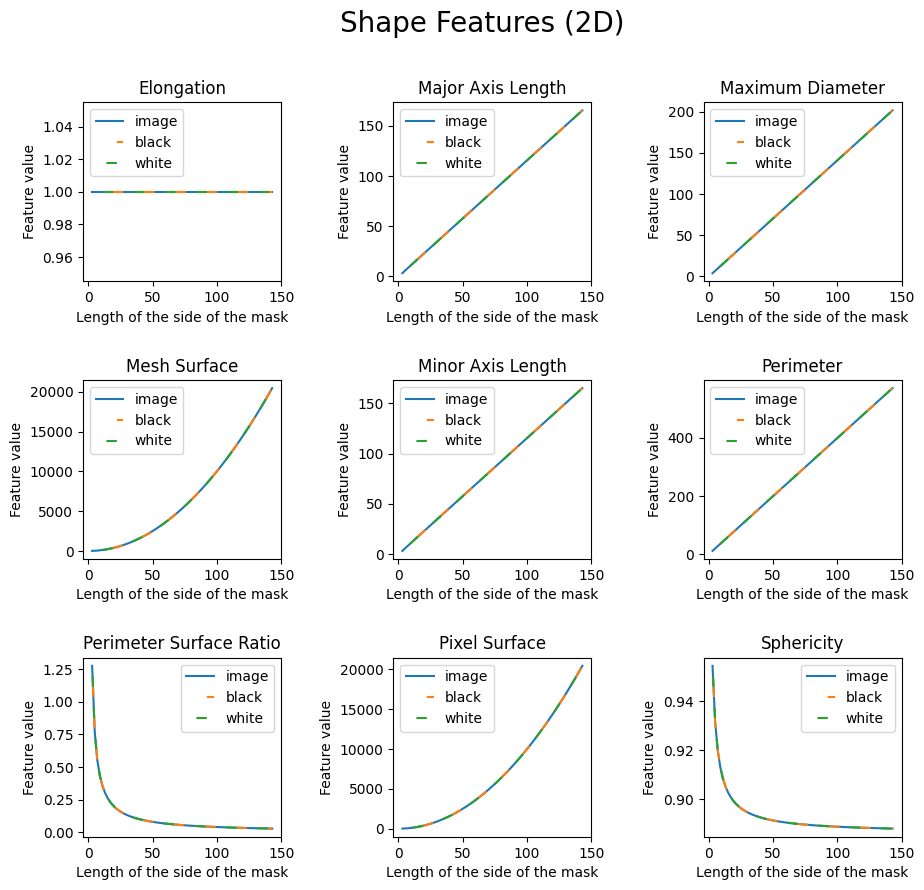

In [15]:
linestyles = {'image': 'solid', 'black' : (5, (5, 10)), 'white' : (10, (5, 10))}
xAxisValues = [value for value in range(3, 145, 2)]

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Shape Features (2D)', fontsize=20, y = 0.92)
fig.tight_layout(pad=5)

i = 0
for key in results['image'][1].keys():
    ax[int(i/3), i%3].set_title(fixTitle(key))
    for photo, valueList in results.items():
        feature = []
        for dictionary in valueList[1:]:
            feature.append(dictionary[key])
        
        ax[int(i/3), i%3].plot(xAxisValues, feature, linestyle=linestyles[photo], label=photo) #mark = 'o'
    
    if i==6 or i==8:
        ax[int(i/3), i%3].legend(loc="upper right")
    else:
        ax[int(i/3), i%3].legend(loc="upper left")
        
    ax[int(i/3), i%3].set_ylabel("Feature value")
    ax[int(i/3), i%3].set_xlabel("Length of the side of the mask")

    i +=1

#plt.savefig(os.path.join(resultsPath, 'shape-features-2d''))
plt.show()

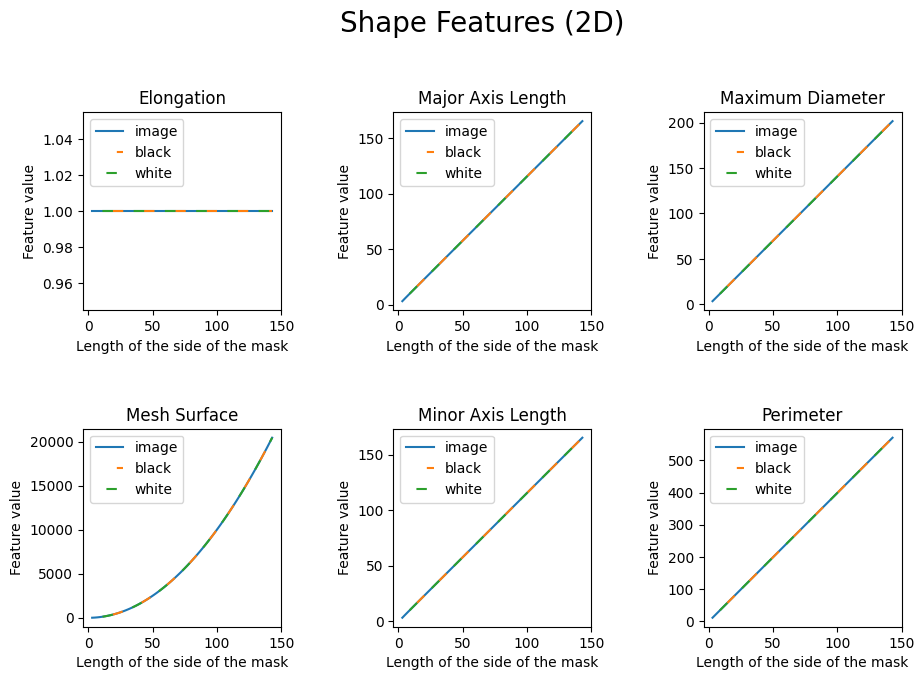

In [13]:
linestyles = {'image': 'solid', 'black' : (5, (5, 10)), 'white' : (10, (5, 10))}
xAxisValues = [value for value in range(3, 145, 2)]

fig, ax = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Shape Features (2D)', fontsize=20, y = 0.9)
fig.tight_layout(pad=5)

i = 0
for key in results['image'][1].keys():
    ax[int(i/3), i%3].set_title(fixTitle(key))
    for photo, valueList in results.items():
        feature = []
        for dictionary in valueList[1:]:
            feature.append(dictionary[key])
        
        ax[int(i/3), i%3].plot(xAxisValues, feature, linestyle=linestyles[photo], label=photo) #mark = 'o'
    
    ax[int(i/3), i%3].legend(loc="upper left")
        
    ax[int(i/3), i%3].set_ylabel("Feature value")
    ax[int(i/3), i%3].set_xlabel("Length of the side of the mask")
    ax[int(i/3), i%3].set_box_aspect(1)

    i +=1
    if i == 6:
        break

#plt.savefig(os.path.join(resultsPath, 'shape-features-2d'))
plt.show()